In [281]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Code Demo1: Basic Cleaning and Heatmap

### 1.Basic Cleanup: BrainStation Dataset

In [282]:
df_stock = pd.read_csv('/Users/jasyot/Desktop/BrainStation/Instructing Data Science Bootcamps/Oct 22nd 2024/4. Data Cleanup/tsla-price.csv')
df_stock.head(3)

,Unnamed: 0,index,Open,Cl-price
0,0,6/29/2010,NaN,p4.778
1,1,6/30/2010,NaN,p4.766
2,2,7/1/2010,NaN,p4.392


In [283]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2961 non-null   int64  
 1   index       2961 non-null   object 
 2   Open        0 non-null      float64
 3   Cl-price    2961 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 92.7+ KB


In [284]:
#1.Make date as index as its a stock price dataset and convert into datetime object

df_stock['date']= pd.to_datetime(df_stock['index']) 

df_stock.set_index('date',inplace=True)

In [285]:
#2.Drop the coll open and unnamed:0

df_stock.drop(['Open','Unnamed: 0'],axis=1,inplace=True)

In [286]:
#3. Clean close price feature

df_stock['close']=df_stock['Cl-price'].str.replace('p','').astype(float)

In [287]:
#4. Remove duplicates

    # check duplicate rows:

dups=df_stock[df_stock.duplicated()]
print(dups)

    # remove dups (just keeping the first occ)

df_stock = df_stock.drop_duplicates()

    # you can delete using specifc colls: df = df.drop_duplicates(subset=['column1', 'column2'])

                index     Cl-price       close
date                                          
2010-07-22  7/22/2010         p4.2    4.200000
2022-03-04   3/4/2022  p838.289978  838.289978
2022-02-22  2/22/2022  p821.530029  821.530029
2021-08-30  8/30/2021  p730.909973  730.909973
2022-02-07   2/7/2022  p907.340027  907.340027


In [288]:
# Final dataset:

df_stock.head(3)

,index,Cl-price,close
date,,,
2010-06-29,6/29/2010,p4.778,4.778
2010-06-30,6/30/2010,p4.766,4.766
2010-07-01,7/1/2010,p4.392,4.392


### 1.1 Basic Cleanup: Other Dataset

#### LOAD THE DATASET

In [323]:
path_d='/Users/jasyot/Desktop/BrainStation/Instructing Data Science Bootcamps/Oct 22nd 2024/4. Data Cleanup/Sarah_Gets_Diamond.csv'
path_g='/Users/jasyot/Desktop/BrainStation/Instructing Data Science Bootcamps/Oct 22nd 2024/4. Data Cleanup//grocery_data.csv'
df_g=pd.read_csv(path_g) #Grocery
df_d=pd.read_csv(path_d) #Diamonds

#### Explore Grocery Dataset

In [290]:
df_g.head(3)

,Obs,Grocery_Bill,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,N_Adults
0,1,$357.73,"$142,141",4,3,15,0,2,1,2
1,2,$276.84,"$145,916",2,1,4,0,0,0,2
2,3,$197.92,"$86,185",1,2,14,0,0,0,1


In [324]:
df_g['Vegetarian']=df_g['Vegetarian'].map({0:"veg",1:"non_veg"})
df_g['N_Children']=df_g['N_Children'].map({0:"one_child",1:"two_child",2:"two_child",3:"three_child"})

In [292]:
df_g.head(3)

,Obs,Grocery_Bill,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,N_Adults
0,1,$357.73,"$142,141",4,3,15,veg,two_child,1,2
1,2,$276.84,"$145,916",2,1,4,veg,one_child,0,2
2,3,$197.92,"$86,185",1,2,14,veg,one_child,0,1


In [325]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Obs                1000 non-null   int64 
 1   Grocery_Bill       1000 non-null   object
 2   Family_Income      1000 non-null   object
 3   Family_Size        1000 non-null   int64 
 4   N_Vehicles         1000 non-null   int64 
 5   Distance_to_Store  1000 non-null   int64 
 6   Vegetarian         1000 non-null   object
 7   N_Children         1000 non-null   object
 8   Family_Pet         1000 non-null   int64 
 9   N_Adults           1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


#### Basic Cleanup Grocery Dataset (Exercise In-class)

In [326]:
# 1. Make bills and income as float data type and remove "$"

df_g['Grocery_Bill']=df_g['Grocery_Bill'].str.replace('$','').str.replace(',', '').str.strip().astype(float)
df_g['Family_Income']=df_g['Family_Income'].str.replace('$','').str.replace(',', '').str.strip().astype(float)

# 2. Make N_Child and Veg as OHE

df_f_encoded = pd.get_dummies(df_g, 
                              columns=['Vegetarian', 'N_Children'], 
                              drop_first=False) # Why drop_first=False and not true? Interview!
df_f_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Obs                     1000 non-null   int64  
 1   Grocery_Bill            1000 non-null   float64
 2   Family_Income           1000 non-null   float64
 3   Family_Size             1000 non-null   int64  
 4   N_Vehicles              1000 non-null   int64  
 5   Distance_to_Store       1000 non-null   int64  
 6   Family_Pet              1000 non-null   int64  
 7   N_Adults                1000 non-null   int64  
 8   Vegetarian_non_veg      1000 non-null   bool   
 9   Vegetarian_veg          1000 non-null   bool   
 10  N_Children_one_child    1000 non-null   bool   
 11  N_Children_three_child  1000 non-null   bool   
 12  N_Children_two_child    1000 non-null   bool   
dtypes: bool(5), float64(2), int64(6)
memory usage: 67.5 KB


In [327]:
df_f_encoded = pd.get_dummies(df_g, 
                              columns=['Vegetarian', 'N_Children'], 
                              drop_first=True) # Why drop_first=False and not true? Interview!

df_f_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Obs                     1000 non-null   int64  
 1   Grocery_Bill            1000 non-null   float64
 2   Family_Income           1000 non-null   float64
 3   Family_Size             1000 non-null   int64  
 4   N_Vehicles              1000 non-null   int64  
 5   Distance_to_Store       1000 non-null   int64  
 6   Family_Pet              1000 non-null   int64  
 7   N_Adults                1000 non-null   int64  
 8   Vegetarian_veg          1000 non-null   bool   
 9   N_Children_three_child  1000 non-null   bool   
 10  N_Children_two_child    1000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 65.6 KB


In [295]:
df_f_encoded.head(3)

,Obs,Grocery_Bill,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Family_Pet,N_Adults,Vegetarian_non_veg,Vegetarian_veg,N_Children_one_child,N_Children_three_child,N_Children_two_child
0,1,357.73,142141.0,4,3,15,1,2,False,True,False,False,True
1,2,276.84,145916.0,2,1,4,0,2,False,True,True,False,False
2,3,197.92,86185.0,1,2,14,0,1,False,True,True,False,False


#### Redundant Features and Heatmap

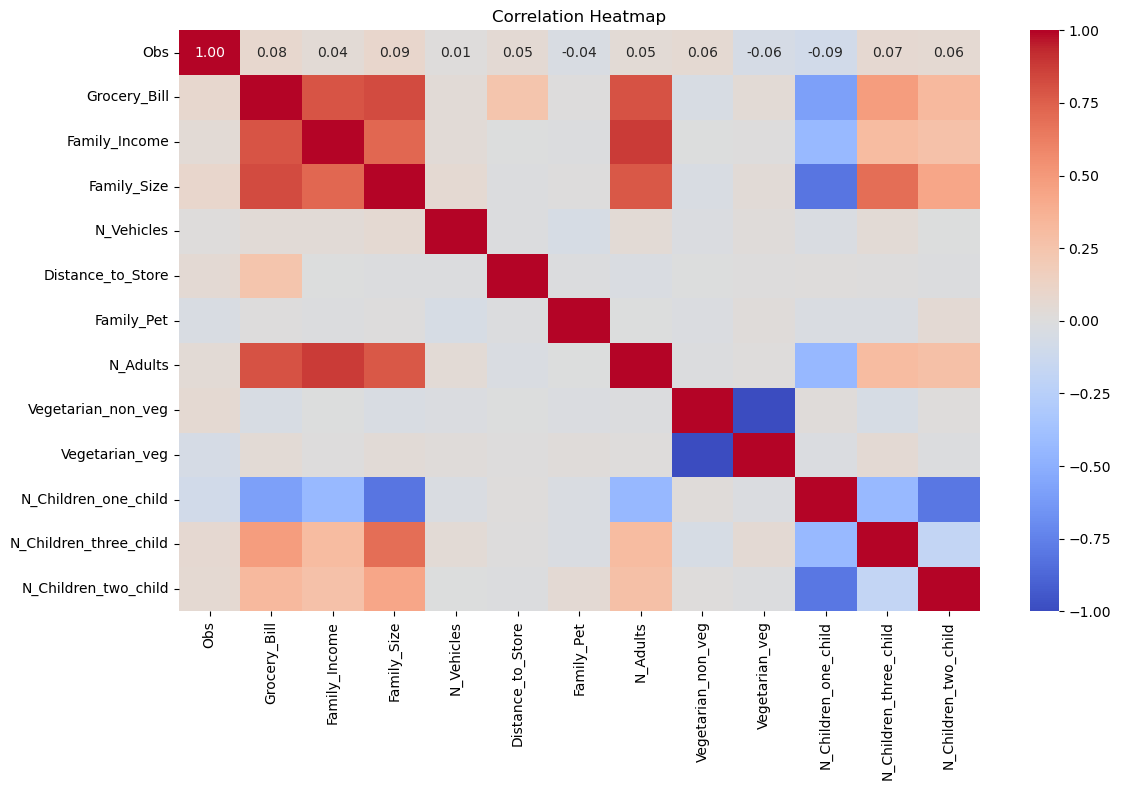

In [69]:
# 1. Correlation

correlations = df_f_encoded.corr()['Grocery_Bill'].sort_values(ascending=False)

    #Heatmap:
    
plt.figure(figsize=(12, 8))
sns.heatmap(df_f_encoded.corr(), 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Color scheme
            center=0,          # Center the colormap at 0
            fmt='.2f')         # Format correlation values to 2 decimal places

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### One Hot Encoding

In [280]:
# 1. Use diamond dataset

df_d.head(4)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Price_imputed_mean
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0,3183.0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0,4370.0


In [297]:
# 2. Use pandas get_dummies function (can use other as well)

df_d_sample_ohe=pd.get_dummies(df_d,
                              columns=['Cut','Color','Clarity','Polish','Symmetry','Report'],
                              drop_first=True) #Important for Intrw
df_d_sample_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9142 entries, 0 to 9141
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9142 non-null   int64  
 1   Carat Weight         9142 non-null   float64
 2   Price                6000 non-null   float64
 3   Cut_Good             9142 non-null   bool   
 4   Cut_Ideal            9142 non-null   bool   
 5   Cut_Signature-Ideal  9142 non-null   bool   
 6   Cut_Very Good        9142 non-null   bool   
 7   Color_E              9142 non-null   bool   
 8   Color_F              9142 non-null   bool   
 9   Color_G              9142 non-null   bool   
 10  Color_H              9142 non-null   bool   
 11  Color_I              9142 non-null   bool   
 12  Clarity_IF           9142 non-null   bool   
 13  Clarity_SI1          9142 non-null   bool   
 14  Clarity_VS1          9142 non-null   bool   
 15  Clarity_VS2          9142 non-null   b

#### EXERCISE: 

# Code Demo2: Missing Data Handling

#### 1. Missing Values

In [107]:
df_d.head(3)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0


In [328]:
df_d.isna().sum()

ID                 0
Carat Weight       0
Cut                0
Color              0
Clarity            0
Polish             0
Symmetry           0
Report             0
Price           3142
dtype: int64

In [ ]:
# If you want to drop all missing values: df.dropna()

# If you want to fill missing values at once you can use df.fillna(method='bfil') - timeseries!

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


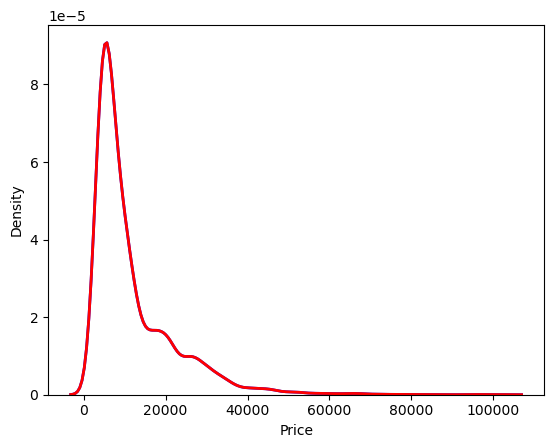

In [330]:
# Lets try Impute missing value by mean:

price_mean = df_d['Price'].mode()

df_d['Price_imputed_mean'] = df_d['Price'].fillna(price_mean)

# Kernerl density plots (for now just use it as a plot, ask if you have any concerns)
sns.kdeplot(data=df_d['Price'], 
            label='Orignal Price',
           color='blue',
           linewidth=2)

sns.kdeplot(data=df_d['Price_imputed_mean'], 
            label='imputed mean Price',
           color='red',
           linewidth=2)


plt.show()

#### Exercise:

In [ ]:
# Start your code here!


In [335]:
df_customer_info=pd.read_csv("/Users/jasyot/Desktop/BrainStation/Instructing Data Science Bootcamps/Oct 22nd 2024/4. Data Cleanup/customer_info.csv")

In [336]:
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSTOMER_ID   10000 non-null  int64  
 1   INDUSTRY      9891 non-null   object 
 2   EMP           8757 non-null   float64
 3   ANNUAL_SALES  9478 non-null   float64
 4   STATE         10000 non-null  object 
 5   MOBILITY      10000 non-null  float64
 6   INTERNET      10000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB


In [337]:
df_customer_info_encoded=pd.get_dummies(df_customer_info,
                                       columns=['STATE','INDUSTRY'],
                                       drop_first=False)

df_customer_info_encoded.drop(['CUSTOMER_ID'],axis=1,inplace=True)

In [338]:
# Calculate mean mode and median for EMP and ANNUAL_SALES

EMP_mean=df_customer_info_encoded['EMP'].mean()
EMP_mode=df_customer_info_encoded['EMP'].mode()
EMP_median=df_customer_info_encoded['EMP'].median()

ANNUAL_SALES_mean=df_customer_info_encoded['ANNUAL_SALES'].mean()
ANNUAL_SALES_mode=df_customer_info_encoded['ANNUAL_SALES'].mode()
ANNUAL_SALES_median=df_customer_info_encoded['ANNUAL_SALES'].median()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


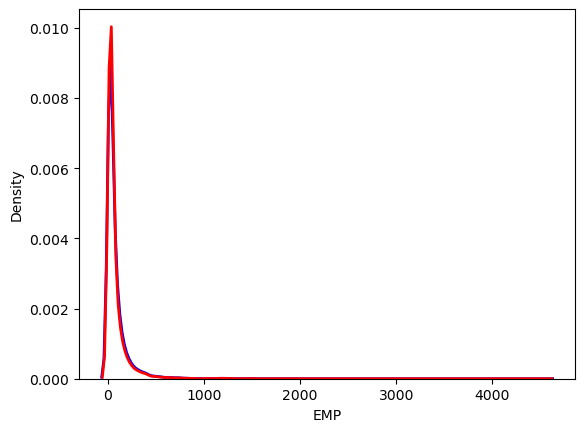

In [341]:
# Impute with mean and check the distribution for EMP:

df_customer_info_encoded['EMP_mean'] = df_customer_info_encoded['EMP'].fillna(EMP_median) # Not mean, mode or median

sns.kdeplot(data=df_customer_info_encoded['EMP'], 
            label='Orignal EMP',
           color='blue',
           linewidth=2)

sns.kdeplot(data=df_customer_info_encoded['EMP_mean'], 
            label='mean imputed EMP',
           color='red',
           linewidth=2)

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


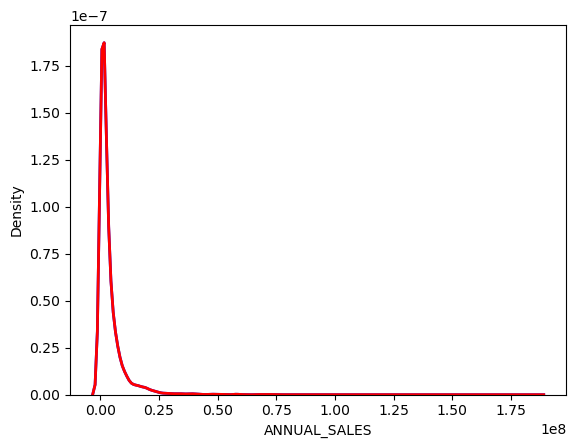

In [343]:
# Impute with mean and check the distribution for ANNUAL_SALES:

df_customer_info_encoded['ANNUAL_SALES_mean'] = df_customer_info_encoded['ANNUAL_SALES'].fillna(sales_mode) #Use mode or mdedian.

sns.kdeplot(data=df_customer_info_encoded['ANNUAL_SALES'], 
            label='Orignal ANNUAL_SALES',
           color='blue',
           linewidth=2)

sns.kdeplot(data=df_customer_info_encoded['ANNUAL_SALES_mean'], 
            label='mean imputed ANNUAL_SALES',
           color='red',
           linewidth=2)

plt.show()

# Code Demo3: Advance Methods Handling Missing Values

#### 1. Running KNN Imputation:

In [344]:
df_KNN=pd.read_csv("/Users/jasyot/Desktop/BrainStation/Instructing Data Science Bootcamps/Oct 22nd 2024/4. Data Cleanup/Car_Prices.csv")

In [345]:
df_KNN.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [346]:
df_KNN.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [347]:
df_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [348]:
df_KNN_e = pd.get_dummies(df_KNN, drop_first=False)

In [349]:
df_KNN_e

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,True,False,...,False,False,False,False,False,False,False,False,False,False
11910,2012,300.0,6.0,4.0,23,16,204,56670,True,False,...,False,False,False,False,False,False,False,False,False,False
11911,2012,300.0,6.0,4.0,23,16,204,50620,True,False,...,False,False,False,False,False,False,False,False,False,False
11912,2013,300.0,6.0,4.0,23,16,204,50920,True,False,...,False,False,False,False,False,False,False,False,False,False


In [350]:
df_KNN_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Columns: 1080 entries, Year to Vehicle Style_Wagon
dtypes: bool(1072), float64(3), int64(5)
memory usage: 12.9 MB


In [351]:
from sklearn.impute import KNNImputer

# create KNN object, decide how many points near by you want to consider.
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the DataFrame to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_KNN_e), columns=df_KNN_e.columns)

In [352]:
df_imputed.isna().sum()

Year                                0
Engine HP                           0
Engine Cylinders                    0
Number of Doors                     0
highway MPG                         0
                                   ..
Vehicle Style_Passenger Minivan     0
Vehicle Style_Passenger Van         0
Vehicle Style_Regular Cab Pickup    0
Vehicle Style_Sedan                 0
Vehicle Style_Wagon                 0
Length: 1080, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


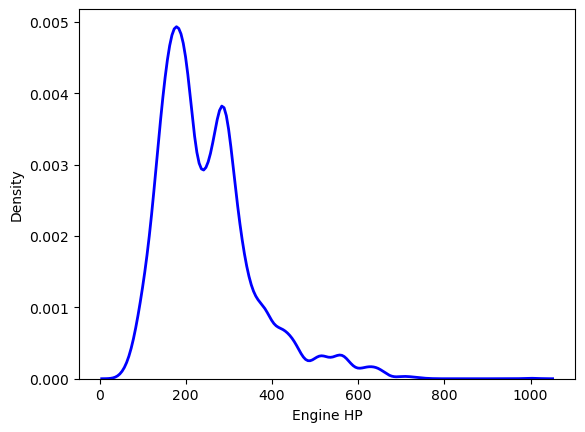

In [353]:
sns.kdeplot(data=df_KNN['Engine HP'], 
            label='Orignal Data Dist',
           color='blue',
           linewidth=2)

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


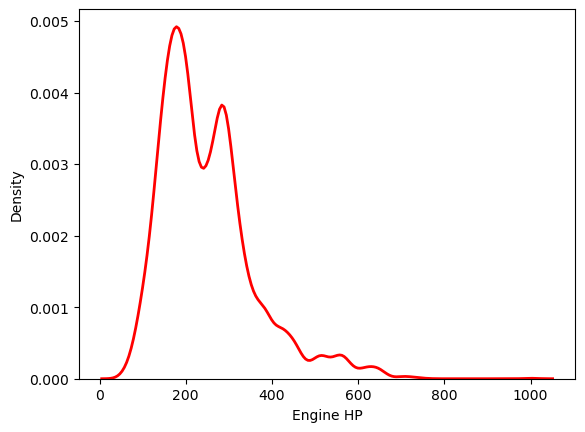

In [354]:
sns.kdeplot(data=df_imputed['Engine HP'], 
            label='New Data Dist',
           color='Red',
           linewidth=2)

plt.show()

#### 2. Running MICE for Imputations (Dummy Data)

In [355]:
# Dummy Data:

datad = {
    'Age': [25, np.nan, 35, 45, np.nan],
    'Income': [50000, 60000, np.nan, 80000, 90000],
    'Education': [np.nan, 2, 3, np.nan, 4],  # Numerical categorical variable
}
df_dummy = pd.DataFrame(datad)

df_dummy.head()

,Age,Income,Education
0,25.0,50000.0,NaN
1,NaN,60000.0,2.0
2,35.0,NaN,3.0
3,45.0,80000.0,NaN
4,NaN,90000.0,4.0


In [356]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=3, 
                           random_state=0)

# Fit and transform the DataFrame to impute missing values
df_imputed_encoded = pd.DataFrame(imputer.fit_transform(df_dummy), columns=df_dummy.columns)

df_imputed_encoded.isna().sum()

Age          0
Income       0
Education    0
dtype: int64

In [320]:
df_imputed_encoded.head()

,Age,Income,Education
0,25.000000,50000.0,1.227154
1,30.727788,60000.0,2.000000
2,35.000000,70000.0,3.000000
3,45.000000,80000.0,3.106213
4,49.952742,90000.0,4.000000


In [321]:
# Running Mice on diamond dataset!

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

df_d_e = pd.get_dummies(df_d, drop_first=True)

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=2, random_state=0)

# Fit and transform the DataFrame to impute missing values
df_imputed_encoded = pd.DataFrame(imputer.fit_transform(df_d_e), columns=df_d_e.columns)

df_imputed_encoded.isna().sum()

ID                     0
Carat Weight           0
Price                  0
Price_imputed_mean     0
Cut_Good               0
Cut_Ideal              0
Cut_Signature-Ideal    0
Cut_Very Good          0
Color_E                0
Color_F                0
Color_G                0
Color_H                0
Color_I                0
Clarity_IF             0
Clarity_SI1            0
Clarity_VS1            0
Clarity_VS2            0
Clarity_VVS1           0
Clarity_VVS2           0
Polish_G               0
Polish_ID              0
Polish_VG              0
Symmetry_G             0
Symmetry_ID            0
Symmetry_VG            0
Report_GIA             0
dtype: int64

In [322]:
df_imputed_encoded.head(3)

,ID,Carat Weight,Price,Price_imputed_mean,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.0,1.10,5169.0,5169.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,0.83,3470.0,3470.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,0.85,3183.0,3183.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 3. Running MissForest

In [ ]:
import pandas as pd
from missingpy import MissForest

# Initialize the MissForest imputer
imputer = MissForest()

# Fit and transform the DataFrame to impute missing values
df_imputed = imputer.fit_transform(df)

# Convert the result back to a DataFrame with the same column names
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Display the first few rows of the imputed DataFrame
print(df_imputed.head())

#### Statistical Method

In [ ]:
mean_weight = df_e['Item_Weight'].mean()
std_weight = df_e['Item_Weight'].std()

random_values = np.random.normal(mean_weight, std_weight, df_e['Item_Weight'].isnull().sum()) # 

df_e['Item_Weight_imputed'] = df_e['Item_Weight'].copy() #inclused nan

df_e.loc[df_e['Item_Weight_imputed'].isnull(), 'Item_Weight_imputed'] = random_values 

sns.kdeplot(data=df_e['Item_Weight'], 
            label='Orignal Value',
           color='blue',
           linewidth=2)

sns.kdeplot(data=df_e['Item_Weight_imputed'], 
            label='Imputed Value',
           color='red',
           linewidth=2)

plt.show()